This class shows the predictions of the Mask R-CNN model without training on the custom dataset

In [1]:
%load_ext autoreload
%autoreload 2

# import and check torch and detectron version
import torch, detectron2

# Setup detectron2 logger
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog

import matplotlib.pyplot as plt
from PIL import Image

from src.notebook_utils import NotebookUtils
from src.finetuner import Finetuner

Predict *Segments* and *Labels* without fine tuning the model

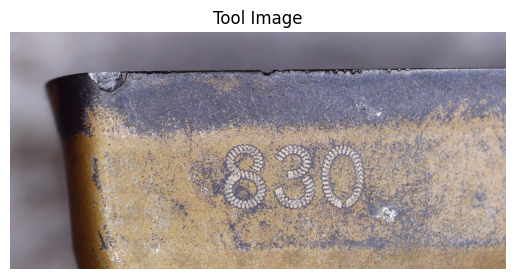

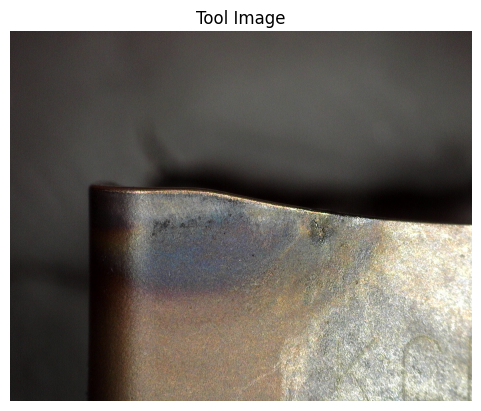

In [13]:
# Tool dataset -----------------------------------------------------------------------------------------
train_dir_tool_dataset = f"../Data/Tool_dataset/train/valid_images"

image_files = [f for f in os.listdir(train_dir_tool_dataset) if f.endswith(('.png', '.jpg', '.jpeg'))]
num_train_images = len(image_files)

random_index = random.randint(0, num_train_images - 1)
tool_im = NotebookUtils.display_image(f"{train_dir_tool_dataset}/{image_files[random_index]}")

# FBA dataset -----------------------------------------------------------------------------------------
train_dir_FBA_dataset = f"../Data/FBA_dataset/train/images"
image_files = [f for f in os.listdir(train_dir_FBA_dataset) if f.endswith(('.png', '.jpg', '.bmp'))]
num_train_images = len(image_files)

random_index = random.randint(0, num_train_images - 1)
fba_im = NotebookUtils.display_image(f"{train_dir_FBA_dataset}/{image_files[random_index]}")

[03/16 11:51:18 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


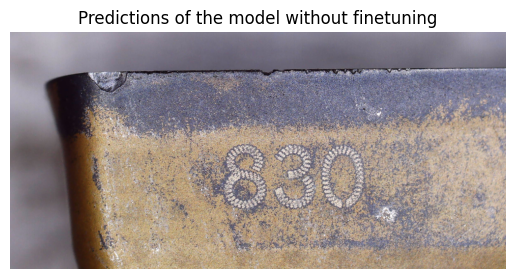

tensor([], device='cuda:0', dtype=torch.int64)
Boxes(tensor([], device='cuda:0', size=(0, 4)))
[03/16 11:51:19 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


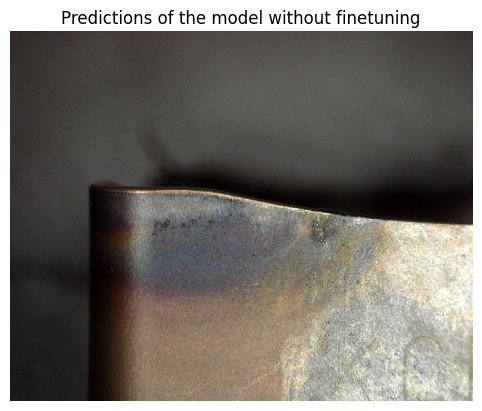

tensor([], device='cuda:0', dtype=torch.int64)
Boxes(tensor([], device='cuda:0', size=(0, 4)))


In [17]:
cfg, outputs = NotebookUtils.predict_classes_without_finetuning(tool_im)
NotebookUtils.show_predictions_of_model(cfg, outputs, tool_im)
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

cfg, outputs = NotebookUtils.predict_classes_without_finetuning(fba_im)
NotebookUtils.show_predictions_of_model(cfg, outputs, fba_im)
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)